In [11]:
# import of required libraries
import pandas as pd
import  matplotlib
import random

In [132]:
# Class to handle session files as different objects
class Session:
    requests = [] # Reads in the session requests
    outputs = [] # outputs for each corresponding request
    fuel_level = [] # maintains fuel level over time

    # Initialize session object with new session file
    def __init__(self):
        self.outputs = []
        self.requests = []

    def read_session(self, file):
        self.outputs = []
        # Read new session file and requests in it
        with open(file) as f:
            line = f.read()
            line = line.split(" ")
            self.requests = line
    
    # Function to get the output for reuests in file with which it was initialized
    def get_output(self):
        # Simulates fuel reading and adds data to total session recordings
        # Done here, because although there is a request fro getting the current fuel level, it might not be triggered
        # in this session, so get a reading on the current reading anyway
        self.fuel_level.append(int(random.randrange(1000, 10000)))

        # Counter to go through all requests
        c = 0

        # Loop reads all requests in session and produces corresponding output
        while c < len(self.requests):
            # Reads in request
            request = int(self.requests[c], 2)

            # Handles start of request
            if request == 0b001:
                self.outputs.append(bin(0b001))
            # Handles end of request
            elif request == 0b100:
                self.outputs.append(bin(0b100))
            # Handles rquest for fuel level report
            elif self.requests == 0b011:
                self.outputs.append(bin(0b011))
                # simulate fuel level report reading
                self.outputs.append(bin(random.randrange(1000, 10000)))
            # Handles request for status of fuel component
            elif request == 0b010:
                # In this case, the next binary number is the component identifier
                c = c + 1
                component = self.requests[c] # identified component
                # Output for request starts with 010
                self.outputs.append(bin(0b010))
                # Simulates status of identified component
                # For simulation purposes, I have maintained a 1/2 probability of success and failure - not ideal in real world
                if random.random() < 0.5:
                    # component is ok
                    self.outputs.append(bin(0b101))
                else:
                    # component is not ok and fail code
                    self.outputs.append(bin(0b110))
                    self.outputs.append(bin(random.randrange(8, 16)))
            c += 1 # increament for going to next request

        return self.outputs # return the outputs

    def plot_fuel(self):
        return pd.Series(self.fuel_level, index=range(len(self.fuel_level))).plot.line()


In [133]:
s = Session()

In [134]:
s.read_session("./session.txt")

In [141]:
s.fuel_level

[3915, 2356, 6827, 9254]

<Axes: >

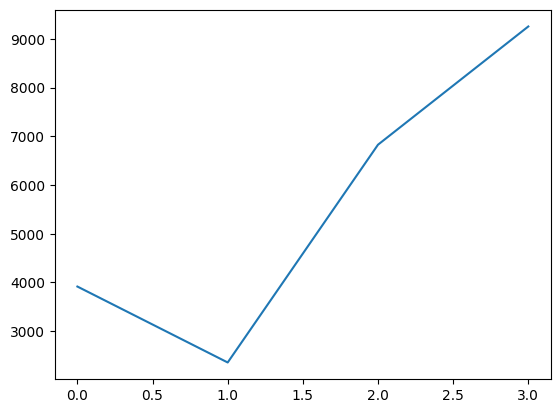

In [142]:
s.plot_fuel()